In [37]:
import pandas as pd

In [39]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [40]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
# Mostrar os dados faltantes
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [43]:
df2 = df.dropna()
df2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

---

## Gráfico de dispersão a partir de coordenadas geográficas

In [44]:
import matplotlib.pyplot as plt

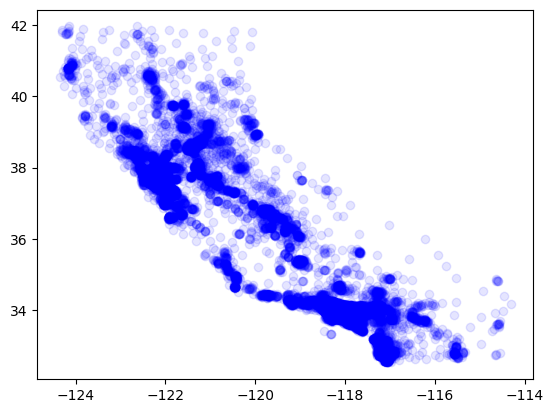

In [45]:
plt.plot(df['longitude'], df['latitude'], 'bo', alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

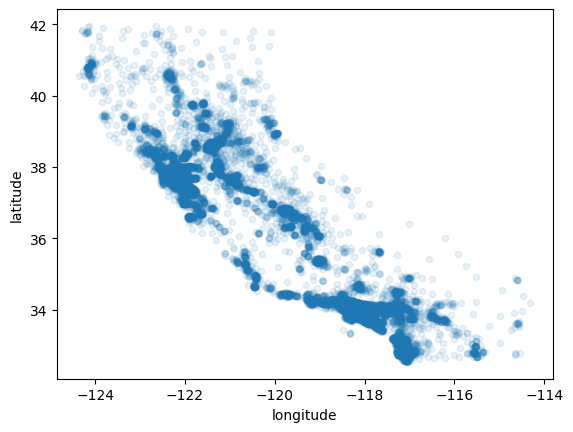

In [46]:
df.plot(x='longitude', y='latitude', kind='scatter', alpha=0.1)

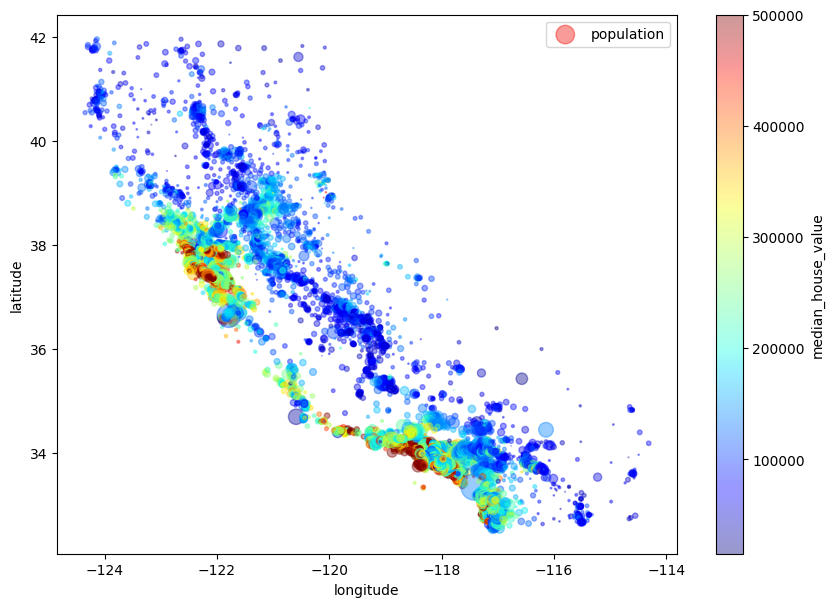

In [47]:
df.plot(x='longitude', y='latitude', kind='scatter', alpha=0.4,
        s = df['population']/100, label='population', figsize=(10,7),
        c= 'median_house_value', cmap = plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [48]:
import folium

In [49]:
lat = df['latitude'].mean()
lon = df['longitude'].mean()

In [50]:
loc = (df['latitude'].mean(),df['longitude'].mean())

mapa = folium.Map(location=loc, zoom_start=6)
mapa

In [51]:
folium.Marker((lat,lon), popup='Rooney').add_to(mapa)
mapa


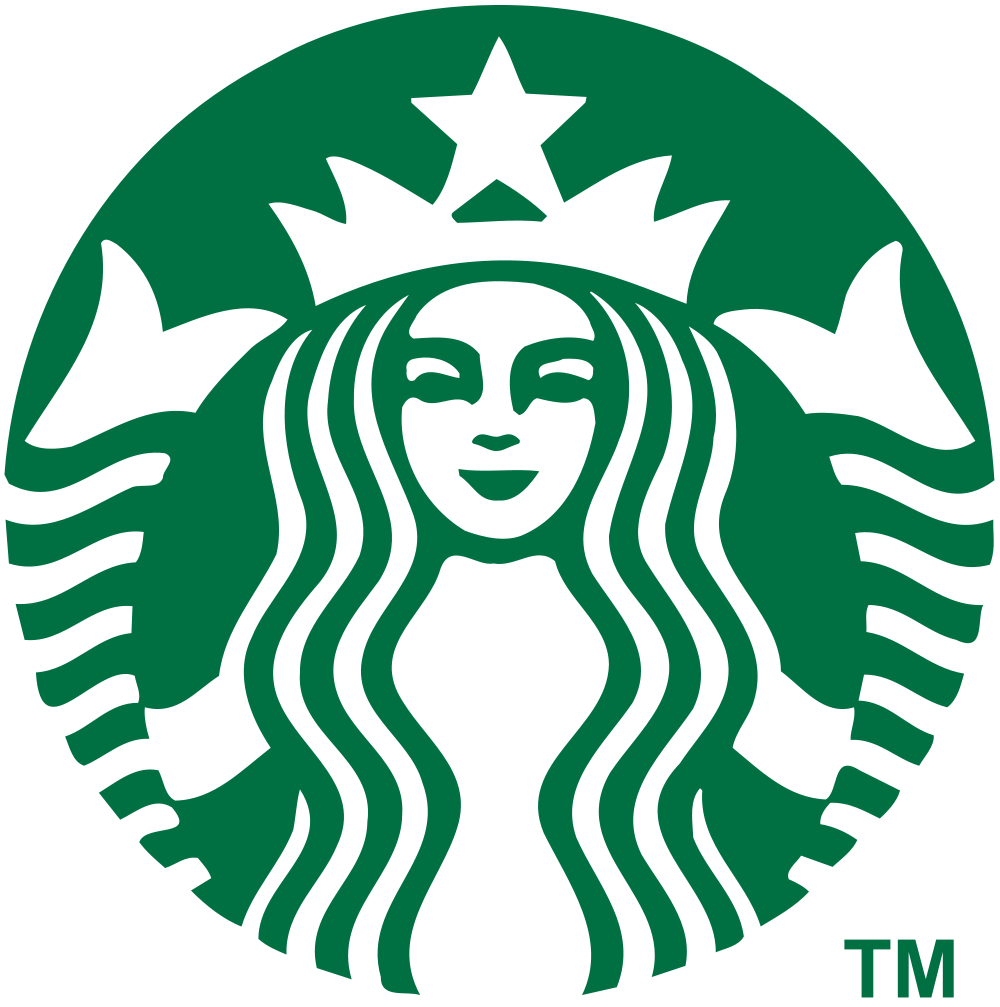

In [52]:
# Criar um ícone personalizado
icon = folium.CustomIcon(icon_image="Starbucks-logo.png", icon_size=(30, 30))

loc = (df['latitude'].mean(),df['longitude'].mean())

mapa = folium.Map(location=loc, zoom_start=6)
folium.Marker((lat,lon), popup='Rooney', icon=icon).add_to(mapa)
mapa

In [53]:
mapa = folium.Map(location=loc, zoom_start=6)
for lat,lon in zip(df['latitude'][0:100], df['longitude'][0:100]):
  folium.Marker((lat,lon)).add_to(mapa)
mapa

In [61]:
from folium.plugins import HeatMap

data = df[['latitude', 'longitude']]

mapa = folium.Map(location=loc, zoom_start=6)
HeatMap(data, radius= 13).add_to(mapa)
mapa